<a href="https://colab.research.google.com/github/mnrazamohamed/NLP-on-Amazon-product-reviews/blob/main/DL_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Name: Raza Mohamed

Student ID: 24148501


This project focuses on building a sentiment classification model using deep learning and natural language processing techniques on Amazon product reviews. The objective is to classify reviews as either positive or negative, leveraging both textual and numerical information (helpfulness ratio), and to implement a robust multi-input model architecture that enhances prediction accuracy.

1) **Dataset and Preprocessing**  
   The Amazon Reviews dataset is loaded and cleaned by removing invalid helpfulness entries and dropping duplicates and null values. A helpfulness ratio feature is engineered to quantify the usefulness of each review. Reviews are labeled as positive (score ≥ 4) or negative (score < 4), creating a binary classification task.

2) **Text Cleaning and Tokenization**  
   The review text and summary undergo a custom NLP preprocessing pipeline involving:
   - HTML removal and lowercasing
   - Contraction expansion and punctuation removal
   - Stopword filtering (with negation words preserved)
   - POS tagging and lemmatization
   - Custom negation handling using _NEG suffixes

   The cleaned text is tokenized and padded to fixed lengths for input into the model. Vocabulary size and optimal sequence lengths are determined based on token coverage.

3) **Multi-Input Model Design**  
   A custom Keras model is built with three input branches:
   - Review text (LSTM over embedded sequence)
   - Summary text (LSTM over embedded sequence)
   - Helpfulness ratio (dense input with L2 regularization)

   These branches are concatenated and passed through fully connected layers with LeakyReLU activation and dropout. The final output layer uses a sigmoid activation for binary classification.

4) **Augmentation and Regularization**  
   During training, text and summary inputs are randomly masked to simulate input noise. Gaussian noise is also applied to the helpfulness ratio. Dropout layers and L2 regularization are used to reduce overfitting.

5) **Training and Evaluation**  
   The model is trained using the tf.data API with early stopping. It is evaluated on accuracy, precision, recall, and F1 score. Visualizations of training and validation performance metrics are generated, and the confusion matrix is used to assess model predictions.

6) **Saving and Export**  
   The model scores are saved in a CSV file, and the trained model is exported in .h5 format for future use.

This project demonstrates a complete NLP pipeline integrating preprocessing, tokenization, augmentation, and a custom multi-branch architecture for sentiment classification using both text and structured numerical inputs.


## Mount Google Drive  
The google.colab library is used to mount Google Drive to the Colab environment. This allows access to files stored in Google Drive by mounting it at /content/drive. After running the code, a prompt will appear to authorize access to Google Drive.


In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Define the path to the reviews dataset  
The path to the Amazon Reviews dataset is specified and stored in the variable reviews_path. This path points to the CSV file stored in Google Drive, which will be used to load the dataset into the notebook.


In [ ]:
reviews_path  = '/content/drive/MyDrive/BCU - MSc in AI/DL ASMT3/AmazonReviews.csv'


## Load the Amazon Reviews Dataset  
The pandas library is used to read the Amazon Reviews dataset from the specified CSV file (reviews_path) and store it in a DataFrame (reviews_df). This allows further analysis and manipulation of the dataset.


In [ ]:
import pandas as pd

reviews_df = pd.read_csv(reviews_path)

## Display the first few rows of the dataset  
The head() function is called on the reviews_df DataFrame to display the first few rows of the dataset. This provides an overview of the data, including the columns and the first few records.


In [ ]:
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Print the column names of the dataset  
The columns.to_list() function is used to print the list of column names in the reviews_df DataFrame. This allows you to see all the available features in the dataset.


In [ ]:
print(reviews_df.columns.to_list())

['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


## Check the shape of the dataset  
The shape attribute of the reviews_df DataFrame is used to check the dimensions of the dataset, i.e., the number of rows and columns. This provides an overview of the dataset's size.


In [ ]:
reviews_df.shape

(568454, 10)

## Display score distribution  
The value_counts() function is used on the 'Score' column of the reviews_df DataFrame to display the distribution of scores in the dataset. This shows how many reviews correspond to each score, helping to understand the distribution of ratings.


In [ ]:
print("Score Distribution:")
reviews_df['Score'].value_counts()

Score Distribution:


,count
Score,
5,363122
4,80655
1,52268
3,42640
2,29769


## Display dataset information  
The info() function is called on the reviews_df DataFrame to display a summary of the dataset. This includes information on the number of non-null entries, data types, and memory usage for each column, helping to identify missing values and the overall structure of the dataset.


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Create and clean helpfulness ratio column  
A new column, helpfulness_ratio, is created by dividing the HelpfulnessNumerator by the HelpfulnessDenominator, ensuring that division by zero is handled by assigning a ratio of 0 in such cases.  

Before cleaning the data, rows where the HelpfulnessNumerator is greater than the HelpfulnessDenominator are checked and displayed for further review. These rows are considered invalid, so they are removed from the DataFrame.  

Finally, the shape of the dataset is printed after removing invalid rows, and statistics on the helpfulness_ratio are displayed using the describe() function.

In [ ]:
# Create a helpfulness ratio column, handling division by zero
reviews_df['helpfulness_ratio'] = reviews_df.apply(
    lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator']
    if row['HelpfulnessDenominator'] != 0 else 0, axis=1
)

# Check invalid rows before dropping
invalid_helpfulness = reviews_df[reviews_df['HelpfulnessNumerator'] > reviews_df['HelpfulnessDenominator']]
print("Rows where HelpfulnessNumerator > HelpfulnessDenominator (before dropping):", len(invalid_helpfulness))
if len(invalid_helpfulness) > 0:
    print("Sample invalid entries (before dropping):")
    display(invalid_helpfulness[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'helpfulness_ratio']].head())

# Drop rows where HelpfulnessNumerator > HelpfulnessDenominator
reviews_df = reviews_df[reviews_df['HelpfulnessNumerator'] <= reviews_df['HelpfulnessDenominator']]
print("Shape after dropping invalid helpfulness rows:", reviews_df.shape)

# Check helpfulness ratio stats
print("Helpfulness Ratio Stats:")
print(reviews_df['helpfulness_ratio'].describe())

Rows where HelpfulnessNumerator > HelpfulnessDenominator (before dropping): 2
Sample invalid entries (before dropping):


,HelpfulnessNumerator,HelpfulnessDenominator,helpfulness_ratio
44736,3,2,1.5
64421,3,1,3.0


Shape after dropping invalid helpfulness rows: (568452, 11)
Helpfulness Ratio Stats:
count    568452.000000
mean          0.407855
std           0.462054
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: helpfulness_ratio, dtype: float64


## Keep only relevant columns  
The DataFrame is filtered to retain only the relevant columns: 'Text', 'Score', 'Summary', and 'helpfulness_ratio'.  

After selecting these columns, the shape of the new DataFrame is printed, followed by the list of remaining columns. The first five rows are displayed to verify the new structure and content of the DataFrame.


In [ ]:
# Keep only relevant columns
columns_to_keep = ['Text', 'Score', 'Summary', 'helpfulness_ratio']
reviews_df = reviews_df[columns_to_keep]

# Verify the new DataFrame
print("Shape after dropping columns:", reviews_df.shape)
print("\nRemaining columns:", reviews_df.columns.to_list())
print("\nFirst 5 rows:")
display(reviews_df.head())

Shape after dropping columns: (568452, 4)

Remaining columns: ['Text', 'Score', 'Summary', 'helpfulness_ratio']

First 5 rows:


,Text,Score,Summary,helpfulness_ratio
0,I have bought several of the Vitality canned d...,5,Good Quality Dog Food,1.0
1,Product arrived labeled as Jumbo Salted Peanut...,1,Not as Advertised,0.0
2,This is a confection that has been around a fe...,4,"""Delight"" says it all",1.0
3,If you are looking for the secret ingredient i...,2,Cough Medicine,1.0
4,Great taffy at a great price. There was a wid...,5,Great taffy,0.0


## Check for duplicate entries  
The duplicated() function is used to identify duplicate rows in the reviews_df DataFrame. The sum() function counts the number of duplicate entries, and the result is printed to show how many duplicates exist in the dataset.


In [ ]:
print("Number of duplicate entries:", reviews_df.duplicated().sum())

Number of duplicate entries: 172591


## Remove duplicate entries  
The drop_duplicates() function is used to remove duplicate rows from the reviews_df DataFrame based on the 'Text' column. The operation is performed in-place, meaning the original DataFrame is modified. The shape of the DataFrame is printed after removing duplicates to show the updated size of the dataset.


In [ ]:
# Remove duplicates based on 'Text'
reviews_df.drop_duplicates( inplace=True)
print("\nShape after removing duplicates:", reviews_df.shape)


Shape after removing duplicates: (395861, 4)


## Check for null values  
The isnull().sum() function is used to check for any null values in each column of the reviews_df DataFrame. The result shows the number of missing values in each column, helping to assess the quality of the dataset and determine if any data imputation or cleaning is necessary.


In [ ]:
# Check for null values
print("\nNull values in each column:")
print(reviews_df.isnull().sum())


Null values in each column:
Text                 0
Score                0
Summary              3
helpfulness_ratio    0
dtype: int64


## Remove rows with any null values  
The dropna() function is used to remove rows with any null values from the reviews_df DataFrame. The operation is performed in-place, meaning the original DataFrame is modified. The shape of the DataFrame is printed after removing the null values to show the updated size of the dataset.


In [ ]:
# Remove rows with any null values
reviews_df.dropna(axis=0, inplace=True)
print("Shape after removing nulls:", reviews_df.shape)

Shape after removing nulls: (395858, 4)


## Check the shape of the dataset  
The shape attribute is used to check the dimensions of the reviews_df DataFrame, providing the number of rows and columns in the dataset after cleaning the null values.


In [ ]:
reviews_df.shape

(395858, 4)

## Display score distribution  
The value_counts() function is used on the 'Score' column of the reviews_df DataFrame to display the distribution of scores in the dataset. This shows how many reviews correspond to each score, helping to understand the distribution of ratings.


In [ ]:
print("Score Distribution:")
reviews_df['Score'].value_counts()

Score Distribution:


,count
Score,
5,252057
4,56288
1,36730
3,29887
2,20896


## Add binary_score for analysis  
A new column, binary_score, is added to the reviews_df DataFrame. This column is generated by applying a function to the 'Score' column, where scores less than 4 are assigned a value of 0 (negative reviews), and scores 4 or above are assigned a value of 1 (positive reviews). This transformation helps simplify the analysis of reviews into two categories: positive and negative.


In [ ]:
# Add binary_score for analysis
reviews_df['binary_score'] = reviews_df['Score'].apply(lambda x: 0 if x < 4 else 1)

## Group by binary_score and check helpfulness_ratio stats  
The groupby() function is used to group the reviews_df DataFrame by the binary_score column. For each group (positive and negative reviews), the describe() function is applied to the helpfulness_ratio column. This provides summary statistics such as mean, standard deviation, and percentiles for the helpfulness ratio, helping to compare the helpfulness of positive and negative reviews.


In [ ]:
# Group by binary_score and check helpfulness_ratio stats
print("Helpfulness Ratio Stats by Binary Score:")
print(reviews_df.groupby('binary_score')['helpfulness_ratio'].describe())

Helpfulness Ratio Stats by Binary Score:
                 count      mean       std  min  25%  50%       75%  max
binary_score                                                            
0              87513.0  0.383524  0.418787  0.0  0.0  0.2  0.833333  1.0
1             308345.0  0.427690  0.476188  0.0  0.0  0.0  1.000000  1.0


## Filter positive reviews based on helpfulness ratio  
The reviews_df DataFrame is separated into positive and negative reviews using the binary_score column. Positive reviews are filtered to retain only those with a helpfulness_ratio greater than or equal to 0.5. The number of such filtered positive reviews is printed to show how many meet the criteria.


In [ ]:
from sklearn.utils import resample

# Separate classes
df_positive = reviews_df[reviews_df['binary_score'] == 1]
df_negative = reviews_df[reviews_df['binary_score'] == 0]

# Filter positive reviews with helpfulness_ratio >= 0.5
df_positive_filtered = df_positive[df_positive['helpfulness_ratio'] >= 0.5]
print("Number of positive reviews with helpfulness_ratio >= 0.5:", len(df_positive_filtered))


Number of positive reviews with helpfulness_ratio >= 0.5: 139221


## Undersample filtered positive class to match negative class  
The filtered positive class is undersampled using the resample function to match the size of the negative class. The replace=False parameter ensures no replacement, and n_samples is set to the size of the negative class. The resulting balanced dataset is then created by combining the undersampled positive class with the negative class.

The shape of the balanced dataset is printed, followed by the new distribution of the binary scores. Finally, summary statistics for the helpfulness_ratio are displayed by grouping the data by binary_score, allowing comparison between positive and negative reviews.


In [ ]:
# Undersample filtered positive class to match negative class
df_positive_under = resample(df_positive_filtered, replace=False, n_samples=len(df_negative), random_state=42)

# Combine
balanced_df = pd.concat([df_positive_under, df_negative])
print("Shape after hybrid balancing:", balanced_df.shape)
print("New Binary Score Distribution:")
print(balanced_df['binary_score'].value_counts())
print("New Helpfulness Ratio Stats:")
print(balanced_df.groupby('binary_score')['helpfulness_ratio'].describe())

Shape after hybrid balancing: (175026, 5)
New Binary Score Distribution:
binary_score
1    87513
0    87513
Name: count, dtype: int64
New Helpfulness Ratio Stats:
                count      mean       std  min  25%  50%       75%  max
binary_score                                                           
0             87513.0  0.383524  0.418787  0.0  0.0  0.2  0.833333  1.0
1             87513.0  0.940897  0.139213  0.5  1.0  1.0  1.000000  1.0


## Install contractions library  
The command !pip install contractions is used to install the contractions library. This library is typically used for expanding common contractions in text (e.g., converting "isn't" to "is not"), which is useful in text preprocessing for natural language processing (NLP) tasks.


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.0 MB/s eta 0:00:00


## Import libraries for text preprocessing  
The necessary libraries for text preprocessing are imported:  
- re for regular expressions,  
- nltk for various natural language processing tasks,  
- contractions for expanding contractions in text,  
- word_tokenize from nltk for tokenizing text into words,  
- stopwords from nltk.corpus for removing common words like "and", "the", etc.,  
- WordNetLemmatizer from nltk.stem for lemmatization (converting words to their base form),  
- BeautifulSoup from bs4 for parsing HTML content.  

Additionally, nltk.download('averaged_perceptron_tagger_eng') is used to download a pre-trained part-of-speech tagger, which will be used for identifying the parts of speech in the text.



In [ ]:
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## Text preprocessing function  
This code defines a preprocess_text function that performs several text preprocessing steps on input text:

1. **HTML parsing**: It removes any HTML tags using BeautifulSoup.
2. **Contraction expansion**: The contractions.fix() function is used to expand contractions (e.g., "isn't" to "is not").
3. **Text normalization**: The text is converted to lowercase, slashes are replaced with spaces, and non-alphabetic characters are removed.
4. **Tokenization**: The text is tokenized into individual words using word_tokenize.
5. **Stopword removal**: Common words like "and", "the", etc., are removed, except for negations such as "not", "no", and "never".
6. **Negation handling**: The function handle_negation is used to add a "_NEG" suffix to words following negations to indicate negation sentiment.
7. **POS tagging and lemmatization**: Parts of speech (POS) tags are assigned to tokens using nltk.pos_tag(), and words are lemmatized based on their POS.

The function is applied to both the 'Text' and 'Summary' columns of the balanced_df DataFrame, creating two new columns: processed_text and processed_summary, containing the preprocessed text for analysis.


In [ ]:
import nltk
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')  # For POS tagging

stop_words = set(stopwords.words('english'))
stop_words.discard('not')
stop_words.discard('no')
stop_words.discard('never')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text(separator=' ')
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'/', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]

    def handle_negation(tokens):
        result = []
        negated = False
        for token in tokens:
            if token in ['not', 'no', 'never', 'nt']:
                negated = True
                result.append(token)
            elif negated and token not in stop_words:
                result.append(token + '_NEG')
                negated = False
            else:
                result.append(token)
                negated = False
        return result

    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('V'):  # Verb
            return 'v'
        elif treebank_tag.startswith('N'):  # Noun
            return 'n'
        elif treebank_tag.startswith('J'):  # Adjective
            return 'a'
        elif treebank_tag.startswith('R'):  # Adverb
            return 'r'
        else:
            return 'n'  # Default to noun

    tokens = handle_negation(tokens)
    # tokens = [lemmatizer.lemmatize(token, pos='v') if '_NEG' not in token else token for token in tokens]
    pos_tags = nltk.pos_tag(tokens)
    tokens = [
        lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) if '_NEG' not in token else token
        for token, tag in pos_tags
    ]
    return ' '.join(tokens)

# Apply to dataset
balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)
balanced_df['processed_summary'] = balanced_df['Summary'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
<ipython-input-23-1596191dd629>:22: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Bea

## Display text from a specific row  
The code retrieves and displays the text from the 'Text' column at index 2496 in the balanced_df DataFrame. This allows you to inspect the content of a specific review in the dataset.


In [ ]:
balanced_df['Text'][2496]

"It seems most of the organic/shade grown/fair trade coffee is medium or dark roasted, so I've been having a hard time finding something that I like.  While this doesn't wow me like some other coffees, it's priced cheaper than those coffees and it's a good brew for when I'm not really paying attention to what I'm drinking (like when I'm working).<br /><br />I'm definitely going to keep this one around, and just switch to the expensive (better) coffees that I've found when I can really enjoy them.<br /><br />Compared to other coffee that's not organic/shade grown/fair trade, this is an average light roast.  Good, but nothing to get excited over.  It's worth purchasing over those coffees because of the growing practices."

## Display processed text from a specific row  
The code retrieves and displays the processed text from the 'processed_text' column at index 2496 in the balanced_df DataFrame. This allows you to inspect the preprocessed version of a specific review in the dataset after applying text preprocessing steps.


In [ ]:
balanced_df['processed_text'][2496]

'seem organic shade grow fair trade coffee medium dark roast hard time find something like not wow_NEG like coffee price cheap coffee good brew not really_NEG pay attention drinking like work definitely go keep one around switch expensive good coffee find really enjoy compare coffee not organic_NEG shade grown fair trade average light roast good nothing get excite worth purchase coffee grow practice'

## Word frequency analysis and vocabulary optimization  
This code performs word frequency analysis on the combined processed text and summary tokens from the balanced_df DataFrame. It counts the frequency of each word and calculates the cumulative coverage of words based on their frequency.

1. **Word frequency**: The frequency of each word is counted using Counter and stored in word_freq. The total number of tokens is calculated by summing the frequencies.
2. **Cumulative coverage**: The cumulative coverage of words is computed by summing the frequencies in sorted order and dividing by the total token count.
3. **Optimal vocabulary size**: The optimal vocabulary size that provides 95% coverage is determined by finding the smallest number of words that account for at least 95% of the total token coverage.

The results, including the total number of unique words, the optimal vocabulary size, and the top 10 most frequent words, are printed for further analysis.


In [ ]:
from collections import Counter
import numpy as np

# Combine all processed text and summary tokens
all_text = balanced_df['processed_text'].tolist() + balanced_df['processed_summary'].tolist()
all_tokens = ' '.join(all_text).split()

# Count word frequencies
word_freq = Counter(all_tokens)
total_tokens = sum(word_freq.values())
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Cumulative coverage
cumulative_tokens = np.cumsum([freq for _, freq in sorted_freq])
coverage = cumulative_tokens / total_tokens

# Find optimal vocab size for 95% coverage
optimal_max_words = next(i for i, cov in enumerate(coverage) if cov >= 0.95) + 1

print("Total unique words:", len(word_freq))
print("Optimal max_words for 95% coverage:", optimal_max_words)
print("Top 10 words:", sorted_freq[:10])

Total unique words: 130491
Optimal max_words for 95% coverage: 8358
Top 10 words: [('not', 273956), ('taste', 95924), ('like', 89938), ('good', 77756), ('product', 74557), ('flavor', 68462), ('one', 61744), ('would', 61414), ('make', 59509), ('use', 57823)]


## Analyze and plot text length distribution  
This code calculates the length of the processed text in terms of token count for each review in the balanced_df DataFrame. The following steps are performed:

1. **Calculate text length**: The length of each processed text is computed by counting the number of tokens (words) using the split() function.
2. **Statistics**: Percentiles (50th, 75th, 90th, 95th, and 99th) of the text lengths are calculated using np.percentile() to understand the distribution of text lengths across the dataset.
3. **Plot distribution**: A histogram is plotted to visualize the distribution of processed text lengths, with the x-axis representing the number of tokens and the y-axis representing the frequency of reviews falling within certain token ranges.
4. **Optimal length suggestion**: The 90th percentile of text length is suggested as the optimal maximum length, indicating that 90% of the reviews are within this length range.

The results, including the text length percentiles and the suggested optimal text length, are printed.


Text length percentiles:
50th (median): 32.0
75th: 55.0
90th: 90.0
95th: 122.0
99th: 215.0


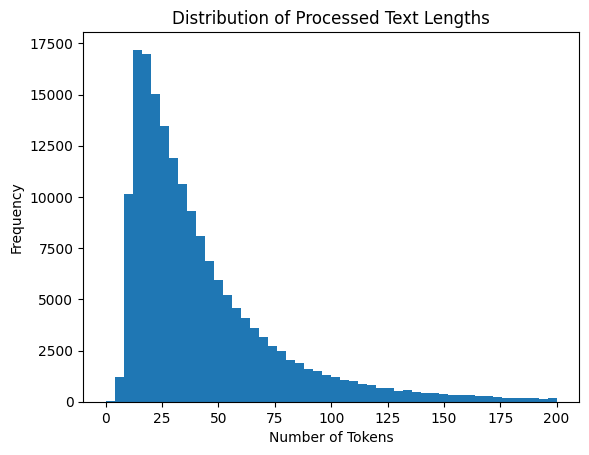

Suggested max_len_text (90% coverage): 90


In [ ]:
import matplotlib.pyplot as plt

# Calculate token lengths
text_lengths = balanced_df['processed_text'].apply(lambda x: len(x.split()))

# Statistics
percentiles = np.percentile(text_lengths, [50, 75, 90, 95, 99])
print("Text length percentiles:")
print(f"50th (median): {percentiles[0]}")
print(f"75th: {percentiles[1]}")
print(f"90th: {percentiles[2]}")
print(f"95th: {percentiles[3]}")
print(f"99th: {percentiles[4]}")

# Plot distribution
plt.hist(text_lengths, bins=50, range=(0, 200))
plt.title("Distribution of Processed Text Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Suggest optimal length
optimal_len_text = int(percentiles[2])  # 90th percentile
print("Suggested max_len_text (90% coverage):", optimal_len_text)

## Analyze and plot summary length distribution  
This code calculates the length of the processed summaries in terms of token count for each review in the balanced_df DataFrame. The following steps are performed:

1. **Calculate summary length**: The length of each processed summary is computed by counting the number of tokens (words) using the split() function.
2. **Statistics**: Percentiles (50th, 75th, 90th, 95th, and 99th) of the summary lengths are calculated using np.percentile() to understand the distribution of summary lengths across the dataset.
3. **Plot distribution**: A histogram is plotted to visualize the distribution of processed summary lengths, with the x-axis representing the number of tokens and the y-axis representing the frequency of reviews falling within certain token ranges.
4. **Optimal length suggestion**: The 95th percentile of summary length is suggested as the optimal maximum length, indicating that 95% of the summaries are within this length range.

The results, including the summary length percentiles and the suggested optimal summary length, are printed.


Summary length percentiles:
50th (median): 3.0
75th: 4.0
90th: 5.0
95th: 6.0
99th: 8.0


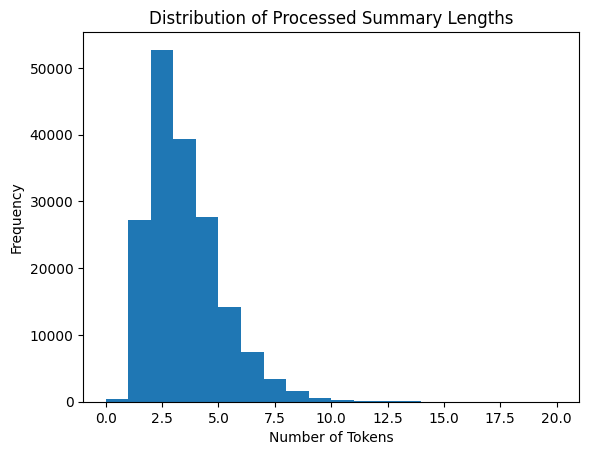

Suggested max_len_summary (95% coverage): 6


In [ ]:
summary_lengths = balanced_df['processed_summary'].apply(lambda x: len(x.split()))

percentiles = np.percentile(summary_lengths, [50, 75, 90, 95, 99])
print("Summary length percentiles:")
print(f"50th (median): {percentiles[0]}")
print(f"75th: {percentiles[1]}")
print(f"90th: {percentiles[2]}")
print(f"95th: {percentiles[3]}")
print(f"99th: {percentiles[4]}")

plt.hist(summary_lengths, bins=20, range=(0, 20))
plt.title("Distribution of Processed Summary Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

optimal_len_summary = int(percentiles[3])  # 95th percentile
print("Suggested max_len_summary (95% coverage):", optimal_len_summary)

## Install and import dependencies  
The necessary libraries for text preprocessing and tokenization are imported:  
- numpy for numerical operations,  
- Tokenizer from tensorflow.keras.preprocessing.text for converting text into sequences of integers,  
- pad_sequences from tensorflow.keras.preprocessing.sequence for ensuring that all sequences have the same length by padding them.

These tools will be used for preparing text data for training machine learning models.


In [ ]:
# Install and import dependencies
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Tokenization and padding of text and summary sequences  
The code sets optimized parameters for the vocabulary size, text length, and summary length based on previous analysis.

1. **Tokenizer Initialization and Fitting**:  
   The Tokenizer is initialized with the specified max_words (vocabulary size) and an out-of-vocabulary token (<OOV>). It is then fitted on both the processed text and summary columns of the balanced_df DataFrame to create a word index for the dataset.

2. **Text to Sequences**:  
   The texts_to_sequences function is used to convert both the processed text and summaries into sequences of integers, where each word is replaced by its corresponding index from the tokenizer’s word index.

3. **Padding Sequences**:  
   The pad_sequences function ensures that all text and summary sequences have the same length (max_len_text and max_len_summary, respectively). Sequences are padded at the end (post padding) and truncated if they exceed the specified lengths.

The vocabulary size, first 5 padded text sequences, first 5 padded summary sequences, and the shapes of X_text and X_summary are printed to verify the results.


In [ ]:

# Set optimized parameters
max_words = 8358       # 95% vocabulary coverage
max_len_text = 90      # 90% text length coverage
max_len_summary = 6    # 95% summary length coverage

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(balanced_df['processed_text'].tolist() + balanced_df['processed_summary'].tolist())

# Convert text to sequences
text_sequences = tokenizer.texts_to_sequences(balanced_df['processed_text'])
summary_sequences = tokenizer.texts_to_sequences(balanced_df['processed_summary'])

# Pad sequences
X_text = pad_sequences(text_sequences, maxlen=max_len_text, padding='post', truncating='post')
X_summary = pad_sequences(summary_sequences, maxlen=max_len_summary, padding='post', truncating='post')

# Verify
print("Vocabulary size:", len(tokenizer.word_index) + 1)
print("First 5 padded text sequences:")
print(X_text[:5])
print("\nFirst 5 padded summary sequences:")
print(X_summary[:5])
print("\nShape of X_text:", X_text.shape)
print("Shape of X_summary:", X_summary.shape)

Vocabulary size: 119149
First 5 padded text sequences:
[[  84   89 3520  442  787 1568   15  641  219  208  113   27   21   80
     5    3  719    2    5   15   29  186   15    6  263    3   25    2
   209 1436  703    5   65  178   24   99    9  196  430  176    6   15
    21   25  107  281   15    3   89    2 3520 1757  787 1568  753  241
   208    6  181   10  692  170   61   15  442 2117    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 604  388   30  895  155  396  190  561  142    5   12  167  121  267
    14    7    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   6 2913 137

## Prepare Inputs and Train-Test Split
Converts preprocessed text, summary, and helpfulness ratio into NumPy arrays and prepares the target labels. The data is then split into training and testing sets using an 80/20 split. This prepares three input branches—text, summary, and numerical helpfulness—for multi-input model training. Final shapes of all splits are printed for verification.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare inputs
X_text = np.array(X_text)  # Already done, just ensuring
X_summary = np.array(X_summary)  # Already done
X_helpfulness = balanced_df['helpfulness_ratio'].values.reshape(-1, 1)  # Reshape for model
y = balanced_df['binary_score'].values

# Train-test split (80% train, 20% test)
X_text_train, X_text_test, X_summary_train, X_summary_test, X_help_train, X_help_test, y_train, y_test = train_test_split(
    X_text, X_summary, X_helpfulness, y, test_size=0.2, random_state=42
)

# Verify shapes
print("Training shapes:")
print("X_text_train:", X_text_train.shape)
print("X_summary_train:", X_summary_train.shape)
print("X_help_train:", X_help_train.shape)
print("y_train:", y_train.shape)
print("\nTesting shapes:")
print("X_text_test:", X_text_test.shape)
print("X_summary_test:", X_summary_test.shape)
print("X_help_test:", X_help_test.shape)
print("y_test:", y_test.shape)

Training shapes:
X_text_train: (140020, 90)
X_summary_train: (140020, 6)
X_help_train: (140020, 1)
y_train: (140020,)

Testing shapes:
X_text_test: (35006, 90)
X_summary_test: (35006, 6)
X_help_test: (35006, 1)
y_test: (35006,)


## Create tf.data Datasets with Augmentation
Defines a custom data augmentation function for a multi-input model with three inputs: text, summary, and helpfulness ratio. The function:
- Randomly masks 10% of tokens in both text and summary sequences
- Adds small Gaussian noise to the helpfulness ratio and clips it between 0 and 1

The training data is wrapped in a TensorFlow Dataset, augmented using map, shuffled, and batched for efficient training. The validation data is converted to a batched dataset without augmentation.


In [ ]:
import tensorflow as tf

# Create training dataset with augmentation
def augment_data(inputs, label):
    text, summary, help = inputs
    # Cast help to float32 to match TensorFlow's default dtype
    help = tf.cast(help, tf.float32)
    # Augment text: randomly set some tokens to 0 (padding token)
    mask_text = tf.random.uniform(shape=tf.shape(text)) < 0.9  # Keep 90% of tokens
    text = tf.where(mask_text, text, 0)
    # Augment summary: randomly set some tokens to 0
    mask_summary = tf.random.uniform(shape=tf.shape(summary)) < 0.9
    summary = tf.where(mask_summary, summary, 0)
    # Add noise to helpfulness ratio
    help = help + tf.random.normal(shape=tf.shape(help), mean=0.0, stddev=0.01, dtype=tf.float32)
    help = tf.clip_by_value(help, 0.0, 1.0)  # Ensure ratio stays between 0 and 1
    return (text, summary, help), label

# Convert training data to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(((X_text_train, X_summary_train, X_help_train), y_train))
train_dataset = train_dataset.map(augment_data, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(64)

# Create validation dataset without augmentation
val_dataset = tf.data.Dataset.from_tensor_slices(((X_text_test, X_summary_test, X_help_test), y_test)).batch(64)

## Build Multi-Input LSTM Model with Regularization and Custom Metrics
Defines a deep learning model with three input branches:
- **Text input** and **summary input** pass through embedding layers followed by LSTM layers with dropout and recurrent dropout
- **Helpfulness ratio input** passes through a dense layer with L2 regularization and LeakyReLU activation

The outputs of all branches are concatenated and passed through dense layers with LeakyReLU and Dropout for regularization. The final output layer uses a sigmoid activation for binary classification.

The model is compiled using binary crossentropy loss and is evaluated with accuracy, precision, recall, and a custom F1 score metric. A model summary is printed to show the architecture.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

# Custom F1 score metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Round predictions to 0 or 1
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Define model parameters
embedding_dim = 100  # Size of word embeddings
lstm_units = 64      # LSTM hidden units
max_words = 8358     # From Cell 3
max_len_text = 90    # From Cell 3
max_len_summary = 6  # From Cell 3

# Input layers
text_input = Input(shape=(max_len_text,), name='text_input')  # (None, 90)
summary_input = Input(shape=(max_len_summary,), name='summary_input')  # (None, 6)
helpfulness_input = Input(shape=(1,), name='helpfulness_input')  # (None, 1)

# Text branch
text_embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len_text, mask_zero=True)(text_input)
text_lstm = LSTM(lstm_units, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(text_embedding)

# Summary branch
summary_embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len_summary, mask_zero=True)(summary_input)
summary_lstm = LSTM(lstm_units, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(summary_embedding)

# Helpfulness branch
helpfulness_dense = Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01))(helpfulness_input)
helpfulness_leaky = LeakyReLU(alpha=0.01)(helpfulness_dense)

# Concatenate all branches
concatenated = Concatenate()([text_lstm, summary_lstm, helpfulness_leaky])

# Fully connected layers
dense = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01))(concatenated)
dense_leaky = LeakyReLU(alpha=0.01)(dense)
dropout = Dropout(0.5)(dense_leaky)  # Prevent overfitting
output = Dense(1, activation='sigmoid')(dropout)  # Binary classification

# Build model
model = Model(inputs=[text_input, summary_input, helpfulness_input], outputs=output)

# Compile model with custom metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 90)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ summary_input             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ helpfulness_input         │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 90, 100)        │        835,800 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 90)             │              0 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 6, 100)         │        835,800 │ summary_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 6)              │              0 │ summary_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │             32 │ helpfulness_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         42,240 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         42,240 │ embedding_1[0][0],     │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 16)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 144)            │              0 │ lstm[0][0],            │
│                           │                        │                │ lstm_1[0][0],          │
│                           │                        │                │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          9,280 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,765,457 (6.73 MB)

 Trainable params: 1,765,457 (6.73 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model with Early Stopping
Trains the model using the augmented training dataset and validates on the test set. Early stopping is used to monitor validation loss, with a patience of 5 epochs. If the validation loss does not improve for 5 consecutive epochs, training stops and the best weights are restored to prevent overfitting.


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 484s 215ms/step - accuracy: 0.8820 - f1_score: 0.3468 - loss: 0.4341 - precision: 0.8656 - recall: 0.9114 - val_accuracy: 0.9309 - val_f1_score: 0.3375 - val_loss: 0.2115 - val_precision: 0.9251 - val_recall: 0.9376
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 476s 217ms/step - accuracy: 0.9289 - f1_score: 0.3361 - loss: 0.2132 - precision: 0.9253 - recall: 0.9330 - val_accuracy: 0.9327 - val_f1_score: 0.3354 - val_loss: 0.1977 - val_precision: 0.9308 - val_recall: 0.9347
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 500s 216ms/step - accuracy: 0.9387 - f1_score: 0.3373 - loss: 0.1871 - precision: 0.9369 - recall: 0.9411 - val_accuracy: 0.9261 - val_f1_score: 0.3291 - val_loss: 0.2134 - val_precision: 0.9365 - val_recall: 0.9140
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 476s 217ms/step - accuracy: 0.9456 - f1_score: 0.3370 - loss: 0.1682 - precision: 0.9431 - recall: 0.9484 - val_accuracy: 0.9296 - val_f1_score: 0.3374 - val_loss: 0.2037 - val_precisi

## Plot training history  
The training history is visualized by plotting various metrics over epochs. Two sets of plots are created:

1. **Model Accuracy and Loss**:  
   The first set of plots shows the training and validation accuracy and loss across epochs to observe how well the model is learning and generalizing.

2. **Model Precision, Recall, and F1 Score**:  
   The second set of plots shows the training and validation precision, recall, and F1 score over epochs. These metrics provide insights into the model's ability to correctly identify positive samples and its balance between precision and recall.

Each plot includes labels for the x-axis (Epoch) and y-axis (Accuracy/Loss/Precision/Recall/F1 Score), with legends to differentiate between training and validation metrics.


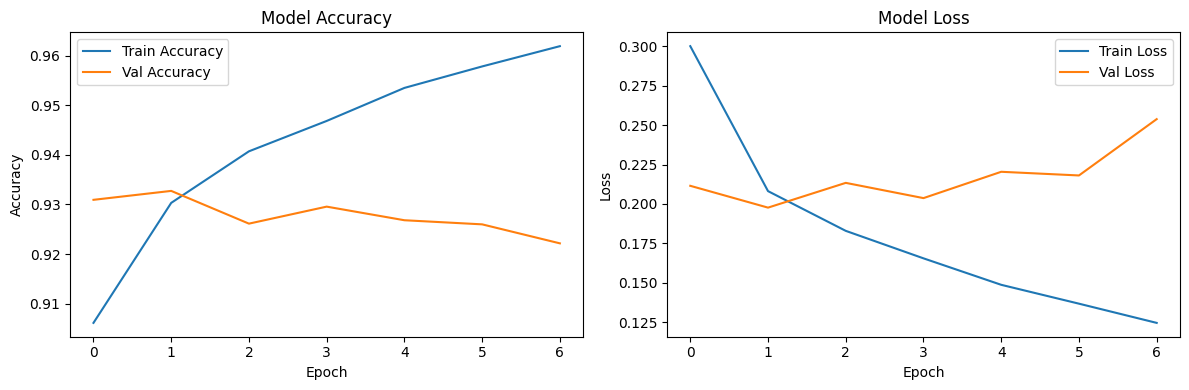

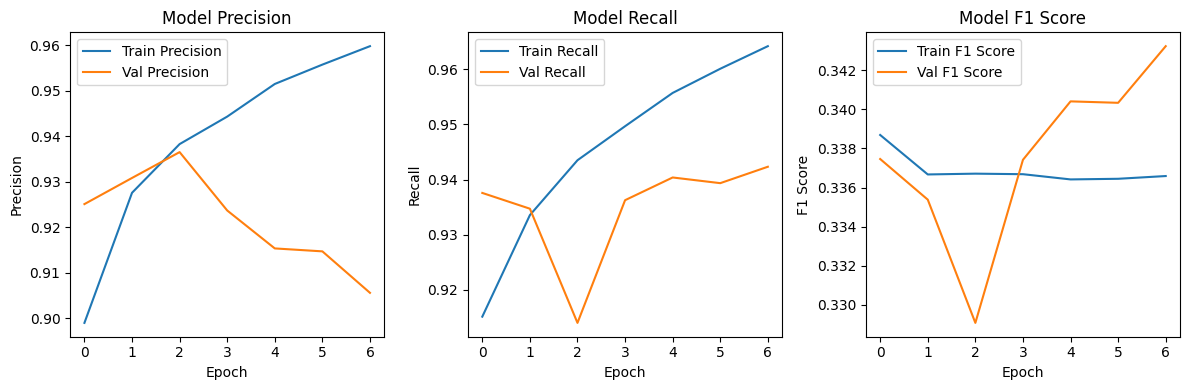

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional metrics plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['f1_score'], label='Train F1 Score')
plt.plot(history.history['val_f1_score'], label='Val F1 Score')
plt.title('Model F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

## Compute and display evaluation metrics  
This code computes key evaluation metrics for the model on the test set:

1. **Predictions**  
   The model's predictions are generated, and probabilities are converted into binary values (0 or 1) using a threshold of 0.5.

2. **Metrics**
   Several metrics are calculated using sklearn:
   - **Precision**: The proportion of true positive predictions to all predicted positives.
   - **Recall**: The proportion of true positive predictions to all actual positives.
   - **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure.
   - **Confusion Matrix**: A matrix showing the true positives, false positives, false negatives, and true negatives.

3. **Results**
   The training accuracy, validation accuracy, precision, recall, F1 score, and confusion matrix are printed. The difference between training and validation accuracy is also displayed to assess potential overfitting.

4. **Confusion Matrix Visualization**
   A heatmap of the confusion matrix is plotted using seaborn to visually represent the performance of the model in distinguishing between negative and positive reviews.

The results give a comprehensive overview of the model’s performance on the test data.


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step
Training Accuracy: 0.9619
Validation Accuracy: 0.9222
Accuracy Difference: 0.0397
Precision: 0.9308
Recall: 0.9347
F1 Score: 0.9328
Confusion Matrix:
 [[16313  1214]
 [ 1141 16338]]


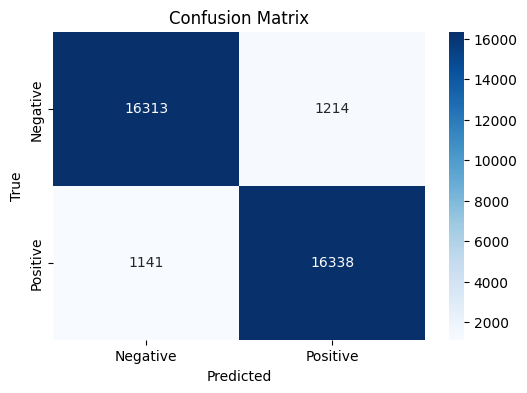

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get predictions for confusion matrix and additional metrics
y_pred = model.predict([X_text_test, X_summary_test, X_help_test])
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to 0/1

# Compute metrics using sklearn (for consistency with confusion matrix)
train_acc = history.history['accuracy'][-1]  # Last epoch training accuracy
val_acc = history.history['val_accuracy'][-1]  # Last epoch validation accuracy
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_m = confusion_matrix(y_test, y_pred_binary)

# Print results
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Accuracy Difference: {(train_acc - val_acc):.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_m)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Store model evaluation results  
The model's evaluation metrics, including training accuracy, validation accuracy, the difference between training and validation accuracy, precision, recall, F1 score, and the confusion matrix, are stored in the model_scores dictionary under the key 'NLP'. This allows for easy access and future reference to these metrics after the model evaluation.


In [ ]:
model_scores = {'NLP': {
    'training_accuracy': train_acc,
    'validation_accuracy': val_acc,
    'train_val_acc_diff': train_acc - val_acc ,
    'precision': prec,
    'recall': rec,
    'f1_score': f1,
    'confusion_matrix': conf_m
}}

## Display model performance scores  
The model_scores dictionary, which contains the evaluation metrics for the model, is converted into a pandas DataFrame for better readability. The DataFrame is displayed to show the detailed evaluation results, including training accuracy, validation accuracy, precision, recall, F1 score, and the confusion matrix.


In [ ]:
import pandas as pd
df_scores = pd.DataFrame.from_dict(model_scores, orient='index')
df_scores

,training_accuracy,validation_accuracy,train_val_acc_diff,precision,recall,f1_score,confusion_matrix
NLP,0.961891,0.922156,0.039735,0.930834,0.934722,0.932774,"[[16313, 1214], [1141, 16338]]"


## Save model scores and model  
The model's performance scores, stored in the df_scores DataFrame, are saved as a CSV file in the specified directory on Google Drive. If the directory doesn't exist, it is created. The file is saved with the name 'model_scores.csv'.

Additionally, the trained model (best_model in this case) is saved in .h5 format, which is the standard format for Keras/TensorFlow models. The model is saved in the same directory, and the path is printed after the save operation.


In [ ]:
import os
import pandas as pd
import joblib

# 2) Save the DataFrame as a CSV
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/DL ASMT3/models'
os.makedirs(save_dir, exist_ok=True)  # create directory if not exists

csv_path = os.path.join(save_dir, 'model_scores.csv')
df_scores.to_csv(csv_path, index=True)
print(f"Saved model scores to: {csv_path}")


# best_model is your VGG19 (keras/tf model)
h5_path = os.path.join(save_dir, 'NLP_model.h5')
model.save(h5_path)
print(f"Saved NLP model to: {h5_path}")

Saved model scores to: /content/drive/MyDrive/BCU - MSc in AI/DL ASMT3/models/model_scores.csv
Saved NLP model to: /content/drive/MyDrive/BCU - MSc in AI/DL ASMT3/models/NLP_model.h5
